## 머신러닝 기반 은행 카드 이탈자 모델링

----

## 머신러닝 기반 카드 고객 이탈자 예측
- 목적
- 데이터 수집
- 데이터 확인 및 시각화
- 데이터 전처리 및 피쳐 엔지니어링
- 모델링
- 테스팅

In [1]:
# 필요한 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 1. 목적
머신러닝 기반 카드 고객 이탈자 예측을 위해 머신러닝 적용

## 2. 데이터 수집

출처 : 케글 [kaggle](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

In [25]:
# 데이터 불러오기
df_org = pd.read_csv("./data/BankChurners.csv")

In [26]:
df_org.shape
df_org.head()
df_org.tail()

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [27]:
df_org.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
         axis=1, inplace=True)

In [28]:
# 데이터 칼럼 및 결측치 확인
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### 컬럼 내용 확인
- 피쳐 내용 확인 및 서로 상관관계 도출

In [29]:
# 칼럼확인 
df_org.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [30]:
columns = df_org.keys()

### Data Dicitionary
- 'CLIENTNUM', 
- 'Attrition_Flag'
- 'Customer_Age'
- 'Gender'
- 'Dependent_count' 
- 'Education_Level' 
- 'Marital_Status',
- 'Income_Category' 
- 'Card_Category'
- 'Months_on_book'
- 'Total_Relationship_Count' 
- 'Months_Inactive_12_mon'
- 'Contacts_Count_12_mon' 
- 'Credit_Limit'
- 'Total_Revolving_Bal'
- 'Avg_Open_To_Buy'
- 'Total_Amt_Chng_Q4_Q1'
- 'Total_Trans_Amt'
- 'Total_Trans_Ct' 
- 'Total_Ct_Chng_Q4_Q1' 
- 'Avg_Utilization_Ratio'
- 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
- 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

### 결측치 확인
- Education_Level
- Marital_Status
- Income_Category

In [101]:
## 복사
df = df_org.copy()

In [73]:
df['Education_Level'].isnull().sum()
df['Marital_Status'].isnull().sum()
df['Income_Category'].isnull().sum()
# (할당된 데이터) 결측치는 없다는 것을 확인 할 수 있다.

0

0

0

In [74]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [75]:
df['Attrition_Flag'].isnull().sum()
df['Attrition_Flag'].value_counts().sum()

0

10127

### 전처리 전에 데이터 분석을 위한 시각화

In [76]:
def bar_chart(feature):
    stay = df[df['Attrition_Flag']=='Existing Customer'][feature].value_counts()
    leave = df[df['Attrition_Flag']=='Attrited Customer'][feature].value_counts()
    temp = pd.DataFrame([stay,leave])
    temp.index = ['Existing Customer','Attrited Customer']
    temp.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

## Education_Level 수준에 따른 고객 이탈자

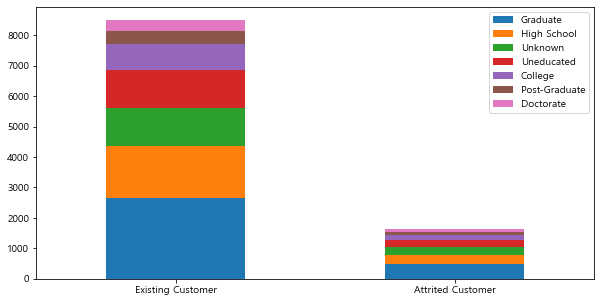

In [77]:
bar_chart('Education_Level')
## unknown 알수 없음
## uneducated 중졸이하
## high school 고졸
## colleage 학사
## graduate / post-graduate 석사
## Docotrate 박사


In [78]:
## Unknown 학력을 알수 없는 정도가 1263
## Uneducated 1250

df[df['Attrition_Flag']=='Existing Customer']['Education_Level'].value_counts()

Graduate         2641
High School      1707
Unknown          1263
Uneducated       1250
College           859
Post-Graduate     424
Doctorate         356
Name: Education_Level, dtype: int64

In [79]:
df.groupby(['Education_Level','Income_Category']).count()

CLIENTNUM  Attrition_Flag  Customer_Age  \
Education_Level Income_Category                                            
College         $120K +                 70              70            70   
                $40K - $60K            183             183           183   
                $60K - $80K            132             132           132   
                $80K - $120K           175             175           175   
                Less than $40K         345             345           345   
                Unknown                108             108           108   
Doctorate       $120K +                 37              37            37   
                $40K - $60K             70              70            70   
                $60K - $80K             59              59            59   
                $80K - $120K            57              57            57   
                Less than $40K         158             158           158   
                Unknown                 70              70            70   
Graduate        $120K +                204             204           204   
                $40K - $60K            553             553           553   
                $60K - $80K            422             422           422   
                $80K - $120K           478             478           478   
                Less than $40K        1139            1139          1139   
                Unknown                332             332           332   
High School     $120K +                147             147           147   
                $40K - $60K            355             355           355   
                $60K - $80K            307             307           307   
                $80K - $120K           308             308           308   
                Less than $40K         671             671           671   
                Unknown                225             225           225   
Post-Graduate   $120K +                 30              30            30   
                $40K - $60K            111             111           111   
                $60K - $80K             77              77            77   
                $80K - $120K            81              81            81   
                Less than $40K         170             170           170   
                Unknown                 47              47            47   
Uneducated      $120K +                119             119           119   
                $40K - $60K            249             249           249   
                $60K - $80K            195             195           195   
                $80K - $120K           217             217           217   
                Less than $40K         522             522           522   
                Unknown                185             185           185   
Unknown         $120K +                120             120           120   
                $40K - $60K            269             269           269   
                $60K - $80K            210             210           210   
                $80K - $120K           219             219           219   
                Less than $40K         556             556           556   
                Unknown                145             145           145   

                                 Gender  Dependent_count  Marital_Status  \
Education_Level Income_Category                                            
College         $120K +              70               70              70   
                $40K - $60K         183              183             183   
                $60K - $80K         132              132             132   
                $80K - $120K        175              175             175   
                Less than $40K      345              345             345   
                Unknown             108              108             108   
Doctorate       $120K +              37               37              37   
    

In [128]:
df_org['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [129]:
df_org[['Education_Level','Income_Category']].value_counts()

Education_Level  Income_Category
Graduate         Less than $40K     1139
High School      Less than $40K      671
Unknown          Less than $40K      556
Graduate         $40K - $60K         553
Uneducated       Less than $40K      522
Graduate         $80K - $120K        478
                 $60K - $80K         422
High School      $40K - $60K         355
College          Less than $40K      345
Graduate         Unknown             332
High School      $80K - $120K        308
                 $60K - $80K         307
Unknown          $40K - $60K         269
Uneducated       $40K - $60K         249
High School      Unknown             225
Unknown          $80K - $120K        219
Uneducated       $80K - $120K        217
Unknown          $60K - $80K         210
Graduate         $120K +             204
Uneducated       $60K - $80K         195
                 Unknown             185
College          $40K - $60K         183
                 $80K - $120K        175
Post-Graduate    Less th

In [131]:
cnt = df_org[['Education_Level','Gender','Income_Category']].groupby(['Education_Level', 'Income_Category'])
cnt

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [134]:
temp = df_org[['Education_Level','Marital_Status','Income_Category']].groupby(['Education_Level', 'Income_Category'])

temp.count()

Marital_Status
Education_Level Income_Category                
College         $120K +                      70
                $40K - $60K                 183
                $60K - $80K                 132
                $80K - $120K                175
                Less than $40K              345
                Unknown                     108
Doctorate       $120K +                      37
                $40K - $60K                  70
                $60K - $80K                  59
                $80K - $120K                 57
                Less than $40K              158
                Unknown                      70
Graduate        $120K +                     204
                $40K - $60K                 553
                $60K - $80K                 422
                $80K - $120K                478
                Less than $40K             1139
                Unknown                     332
High School     $120K +                     147
                $40K - $60K                 355
                $60K - $80K                 307
                $80K - $120K                308
                Less than $40K              671
                Unknown                     225
Post-Graduate   $120K +                      30
                $40K - $60K                 111
                $60K - $80K                  77
                $80K - $120K                 81
                Less than $40K              170
                Unknown                      47
Uneducated      $120K +                     119
                $40K - $60K                 249
                $60K - $80K                 195
                $80K - $120K                217
                Less than $40K              522
                Unknown                     185
Unknown         $120K +                     120
                $40K - $60K                 269
                $60K - $80K                 210
                $80K - $120K                219
                Less than $40K              556
                Unknown                     145

## Unknow 처리
#### Unknown에 Unknown에 더한 경우 

#### 교육 Unknown + 소득 ($120K +) >>> Graduate

In [100]:
## 교육 Unknown + 소득 ($120K +) >>> Graduate

df['Education_Level'] = df.apply(lambda x:'Graduate' if x['Education_Level'] == 'Unknown' and x['Income_Category'] == '$120K +'
                                 
                                 else  x['Education_Level']  , axis=1)


In [ ]:
### 문제발생 어떻게 비율로 나타낼지 모르겠음 HELP ME

In [ ]:
#### 교육 Unknown + 소득 ($80𝐾− 120K) >>> Graduate

In [ ]:
#### 교육 Unknown + 소득 (60𝐾− 80K)

In [ ]:
#### 교육 Unknown + 소득 ($120K +)

In [ ]:
#### 교육 Unknown + 소득 ($120K +)

In [89]:
df['Education_Level'] = df.apply(lambda x:'Graduate' if x['Education_Level']=='Unknown', axis=1)

SyntaxError: invalid syntax (<ipython-input-89-b2997edc7023>, line 1)

In [69]:
df = df.apply(get_change, axis=1)

In [93]:
df['Education_Level']

0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123       Graduate
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: object

## 맵핑 작업

In [252]:
### 맵핑 작억
### 숫자로 변경

Education_Level_mapping = {"Unknown": 0, "Uneducated": 1, "High School": 2, 
                           "College": 3, "Graduate": 4, "Post-Graduate": 4, "Doctorate": 5}

df['Education_Level'] = df['Education_Level'].map(Education_Level_mapping)

In [253]:
df['Education_Level']

0        2
1        4
2        4
3        2
4        1
        ..
10122    4
10123    0
10124    2
10125    4
10126    4
Name: Education_Level, Length: 10127, dtype: int64

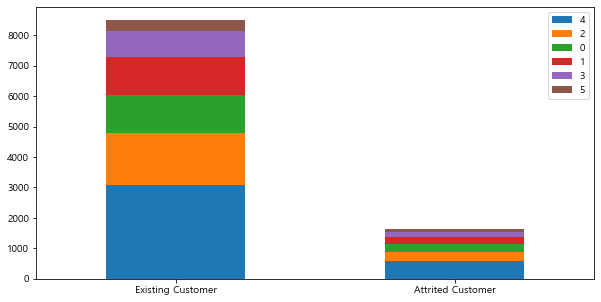

In [254]:
bar_chart('Education_Level')

In [255]:
df['Attrition_Flag'].iloc[:]

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Education_Level'>

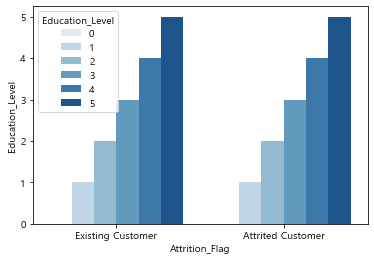

In [256]:
x = df['Attrition_Flag']
y = df['Education_Level']
sns.barplot(data= df, x = x, y = y, hue= 'Education_Level', palette = 'Blues')

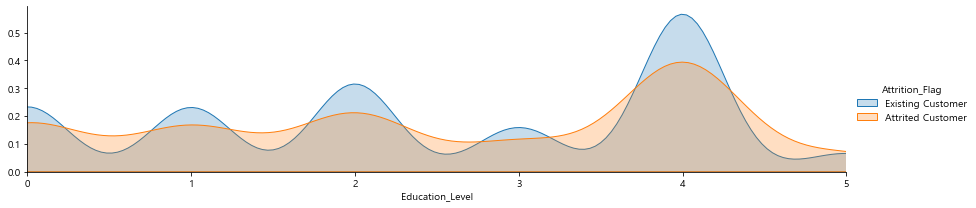

In [257]:
facet = sns.FacetGrid(df, hue="Attrition_Flag",aspect=4)
facet.map(sns.kdeplot,'Education_Level',shade= True)
facet.set(xlim=(0, df['Education_Level'].max()))
facet.add_legend()
 
plt.show() 

## Marital_Status 수준에 따른 고객 이탈자 (결혼여부)

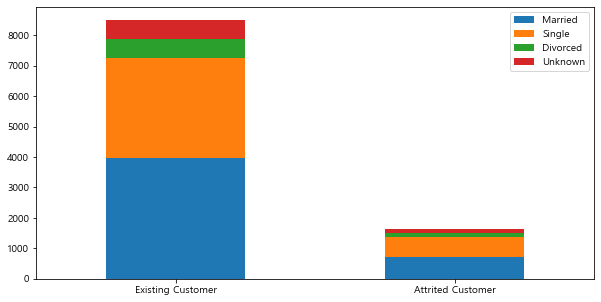

In [258]:
bar_chart('Marital_Status')

### 주요내용 확인

In [259]:
df[['Attrition_Flag','Marital_Status']].value_counts()

Attrition_Flag     Marital_Status
Existing Customer  Married           3978
                   Single            3275
Attrited Customer  Married            709
                   Single             668
Existing Customer  Divorced           627
                   Unknown            620
Attrited Customer  Unknown            129
                   Divorced           121
dtype: int64

In [260]:
## 결혼 여부 숫자
df[df['Attrition_Flag']=='Existing Customer']['Marital_Status'].value_counts()

print('------ 구별선 -------')

df[df['Attrition_Flag']=='Attrited Customer']['Marital_Status'].value_counts()

Married     3978
Single      3275
Divorced     627
Unknown      620
Name: Marital_Status, dtype: int64

------ 구별선 -------


Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: int64

**Unknow 숫자 741**


741/10127 = 0.073 >>> 약 7.3%

In [261]:
## 결혼 여부에 따른 수입 상태
temp = df_org[['Education_Level','Marital_Status','Income_Category']].groupby(['Marital_Status', 'Income_Category'])
temp.count()

Education_Level
Marital_Status Income_Category                 
Divorced       $120K +                       52
               $40K - $60K                  138
               $60K - $80K                  108
               $80K - $120K                 103
               Less than $40K               254
               Unknown                       93
Married        $120K +                      354
               $40K - $60K                  816
               $60K - $80K                  661
               $80K - $120K                 735
               Less than $40K              1628
               Unknown                      493
Single         $120K +                      274
               $40K - $60K                  704
               $60K - $80K                  531
               $80K - $120K                 561
               Less than $40K              1429
               Unknown                      444
Unknown        $120K +                       47
               $40K - $60K                  132
               $60K - $80K                  102
               $80K - $120K                 136
               Less than $40K               250
               Unknown                       82

In [262]:
df[['Marital_Status','Income_Category']].value_counts()

Marital_Status  Income_Category
Married         Less than $40K     1628
Single          Less than $40K     1429
Married         $40K - $60K         816
                $80K - $120K        735
Single          $40K - $60K         704
Married         $60K - $80K         661
Single          $80K - $120K        561
                $60K - $80K         531
Married         Unknown             493
Single          Unknown             444
Married         $120K +             354
Single          $120K +             274
Divorced        Less than $40K      254
Unknown         Less than $40K      250
Divorced        $40K - $60K         138
Unknown         $80K - $120K        136
                $40K - $60K         132
Divorced        $60K - $80K         108
                $80K - $120K        103
Unknown         $60K - $80K         102
Divorced        Unknown              93
Unknown         Unknown              82
Divorced        $120K +              52
Unknown         $120K +              47
dtype: i

<AxesSubplot:xlabel='Marital_Status,Income_Category'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '(Married, Less than $40K)'),
  Text(1, 0, '(Single, Less than $40K)'),
  Text(2, 0, '(Married, $40K - $60K)'),
  Text(3, 0, '(Married, $80K - $120K)'),
  Text(4, 0, '(Single, $40K - $60K)'),
  Text(5, 0, '(Married, $60K - $80K)'),
  Text(6, 0, '(Single, $80K - $120K)'),
  Text(7, 0, '(Single, $60K - $80K)'),
  Text(8, 0, '(Married, Unknown)'),
  Text(9, 0, '(Single, Unknown)'),
  Text(10, 0, '(Married, $120K +)'),
  Text(11, 0, '(Single, $120K +)'),
  Text(12, 0, '(Divorced, Less than $40K)'),
  Text(13, 0, '(Unknown, Less than $40K)'),
  Text(14, 0, '(Divorced, $40K - $60K)'),
  Text(15, 0, '(Unknown, $80K - $120K)'),
  Text(16, 0, '(Unknown, $40K - $60K)'),
  Text(17, 0, '(Divorced, $60K - $80K)'),
  Text(18, 0, '(Divorced, $80K - $120K)'),
  Text(19, 0, '(Unknown, $60K - $80K)'),
  Text(20, 0, '(Divorced, Unknown)'),
  Text(21, 0, '(Unknown, Unknown)'),
  T

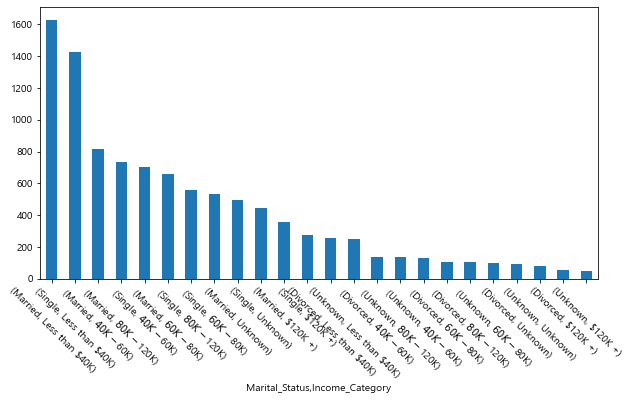

In [263]:

temp = df[['Marital_Status','Income_Category']].value_counts()

temp.plot(kind='bar',stacked=True, figsize=(10,5))
plt.xticks(rotation=-45)

In [264]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

## 매핑 작업

In [265]:
### 맵핑 작억
### 숫자로 변경

Marital_Status_mapping = {"Unknown": 0, "Married": 1, "Divorced": 2, 
                           "Single": 3}

df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_mapping)

In [266]:
df['Marital_Status']

0        1
1        3
2        1
3        0
4        1
        ..
10122    3
10123    2
10124    1
10125    0
10126    1
Name: Marital_Status, Length: 10127, dtype: int64

## Income_Category수준에 따른 고객 이탈자

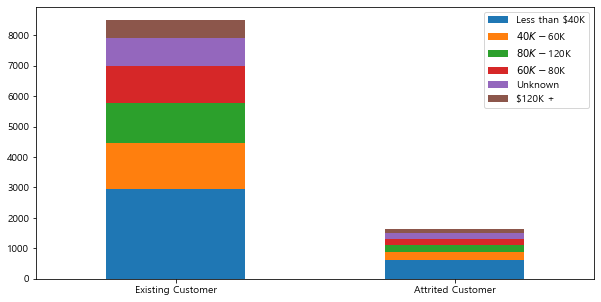

In [271]:
bar_chart('Income_Category')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Marital_Status'>

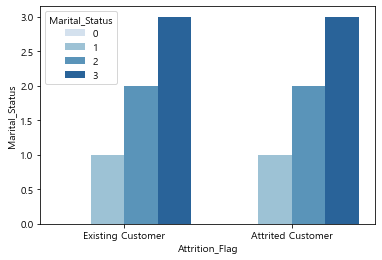

In [269]:
x = df['Attrition_Flag']
y = df['Marital_Status']
sns.barplot(data= df, x = x, y = y, hue= 'Marital_Status', palette = 'Blues')

### 정규분포 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

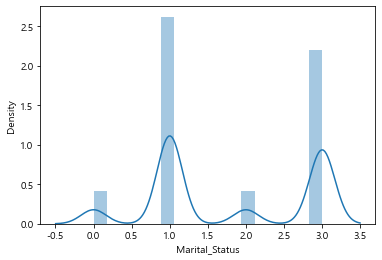

In [270]:
sns.distplot(df["Marital_Status"])

## Income_Category 따른 고객 이탈자 ()

In [ ]:
sns.distplot(df["Income_Category"])

In [ ]:
# 이상치 확인
sns.boxplot(df["Customer_Age"])
# 2개의 이상치를 확인할 수 있다.

In [ ]:
df["Customer_Age"].np.quantile(0.75)

In [ ]:
df["Gender"].value_counts()
# Female 아니면 Male로 이진분류가 잘 되어있다.
# Label Encoding을 해주면 되겠다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Gender"])
df["Gender"] = le.transform(df["Gender"])

In [ ]:
df["Gender"] # 라벨인코딩 된 것을 확인 할 수 있다.

In [ ]:
df.iloc[:,5:10].head(5)